In [1]:
# install.packages(c("visNetwork", "geomnet", "igraph"))

In [6]:
#install.packages(c("h2o", "visNetwork", "geomnet", "igraph", "prophet", "plotly"), reps = "https://cran.microsoft.com/snapshot/2021-03-01")

In [2]:
.libPaths("C:\\Users\\ben\\3.6")

In [5]:
library(h2o)
library(dplyr)
library(visNetwork)
library(geomnet)
library(igraph)
# library(prophet)
library(plotly)

Warning message:
"package 'plotly' was built under R version 3.6.3"
Attaching package: 'plotly'

The following object is masked from 'package:igraph':

    groups

The following object is masked from 'package:ggplot2':

    last_plot

The following object is masked from 'package:stats':

    filter

The following object is masked from 'package:graphics':

    layout



# Data Loading from csv and preparation

In [6]:
# path <- 'C:/Users/ben/lego/'
path = 'C:/Users/ben/Documents/GitHub/lego-2/'
df <- read.csv(paste0(path,'output.csv'))

## Create crossprod from dummy variabkes
dim(df)
x1 <- as.matrix(df[,which(grepl("primary_tag_", names(df)))])
x2 <- as.matrix(df[,which(grepl("secondary_tag_", names(df)))])
x1_cp <-crossprod(x1) 
x2_cp <-crossprod(x2)

## Create mapping table from primary tags
table1 <- data.frame()
r <- 0
for (i in 1:(nrow(x1_cp)-1)){
  for (j in (i+1):ncol(x1_cp)){
    if(x1_cp[i,j] > 0) {
      r = r + 1
      table1[r,"from"]  <- rownames(x1_cp)[i]
      table1[r,"to"]    <- colnames(x1_cp)[j]
      table1[r,"count"] <- x1_cp[i,j]
      # print(r)
    }
  }
}

## Create mapping table from secodary tags, 1 filter of 10 has been set on the edge to reduce the size of the matrix due to 
## performance issue.
table2 <- data.frame()
r <- 0
for (i in 1:(nrow(x2_cp)-1)){
  for (j in (i+1):ncol(x2_cp)){
    if(x2_cp[i,j] >= 10) {
      r = r + 1
      table2[r,"from"]  <- rownames(x2_cp)[i]
      table2[r,"to"]    <- colnames(x2_cp)[j]
      table2[r,"count"] <- x2_cp[i,j]
      # print(r)
    }
  }
}

dim(table1)
dim(table2)

[1] 6391 4138

[1] 604   3

[1] 3047    3

# Primary Tag Network

In [7]:
table1$from <- gsub("primary_tag_", "", table1$from)
table1$to <- gsub("primary_tag_", "", table1$to)

##Nodes
nodes <- data.frame(id = unique(table1$from), 
                    label = unique(table1$from))

##Edges
edges <- as.data.frame(table1)
colnames(edges) <- c("from", "to", "width")

##Create graph for Louvain
graph <- graph_from_data_frame(edges, directed = FALSE)

##Louvain Comunity Detection
cluster <- cluster_louvain(graph)
cluster_df <- data.frame(as.list(membership(cluster)))
cluster_df <- as.data.frame(t(cluster_df))
cluster_df$label <- rownames(cluster_df)

nodes <- left_join(nodes, cluster_df, by = "label")
colnames(nodes)[3] <- "group"
visNetwork(nodes, edges)

HTML widgets cannot be represented in plain text (need html)

# Secondary Tag Network

# Model to predict product own

With the data we downloadn from b

Input: 
* 'main_tags','secondary_tags', pieces, community_want, availability

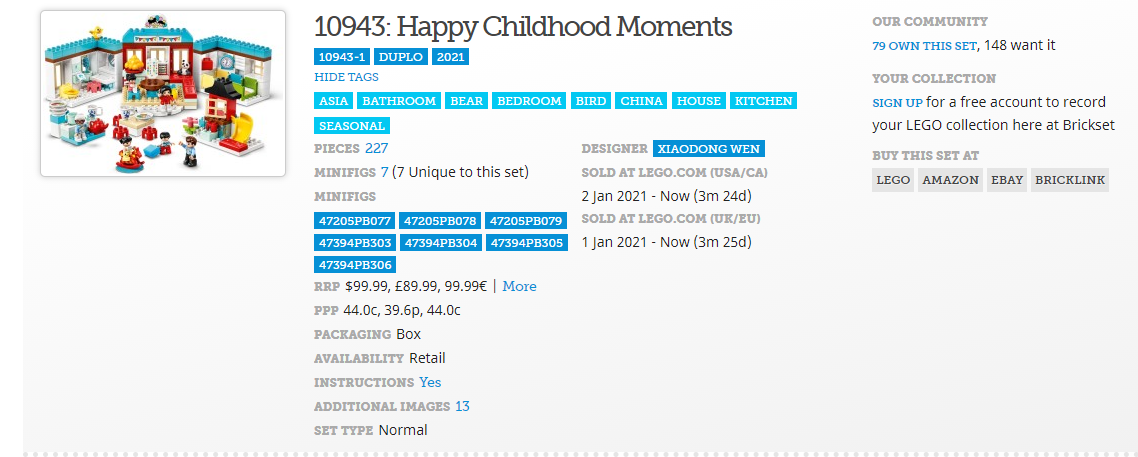

Output:
* community_own

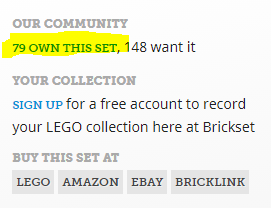


In [15]:
colnames(df)

[1] "year"                                                
   [2] "id"                                                  
   [3] "name"                                                
   [4] "communitywant"                                       
   [5] "communityown"                                        
   [6] "maintags"                                            
   [7] "secondarytags"                                       
   [8] "mainlinks"                                           
   [9] "secondarylinks"                                      
  [10] "pieces"                                              
  [11] "rrpusd"                                              
  [12] "rrpgbp"                                              
  [13] "rrpeur"                                              
  [14] "availability"                                        
  [15] "released"                                            
  [16] "primarytagCampCretaceous"                            
  [17] "primarytag2in1"                                      
  [18] "primarytag3in1"                                      
  [19] "primarytagAHeroisBorn"                               
  [20] "primarytagAFOLDesignerProgram"                       
  [21] "primarytagAccessories"                               
  [22] "primarytagAccessorySets"                             
  [23] "primarytagAdidas"                                    
  [24] "primarytagAdventureCamp"                             
  [25] "primarytagAirjitzu"                                  
  [26] "primarytagAirport"                                   
  [27] "primarytagAladdin"                                   
  [28] "primarytagAmusementPark"                             
  [29] "primarytagAnUnexpectedJourney"                       
  [30] "primarytagAnimalsseries4"                            
  [31] "primarytagAnimalsseries5"                            
  [32] "primarytagAnimalsseries6"                            
  [33] "primarytagAntMan"                                    
  [34] "primarytagAntManandtheWasp"                          
  [35] "primarytagArcadePod"                                 
  [36] "primarytagArchitecture"                              
  [37] "primarytagArctic"                                    
  [38] "primarytagArt"                                       
  [39] "primarytagArvoBrothers"                              
  [40] "primarytagAudi"                                      
  [41] "primarytagAvengers"                                  
  [42] "primarytagAvengersAssemble"                          
  [43] "primarytagAvengersAgeofUltron"                       
  [44] "primarytagAvengersEndgame"                           
  [45] "primarytagAvengersInfinityWar"                       
  [46] "primarytagBacktotheFuture"                           
  [47] "primarytagBagCharms"                                 
  [48] "primarytagBagTag"                                    
  [49] "primarytagBagcharms"                                 
  [50] "primarytagBags"                                      
  [51] "primarytagBandmatesSeries1"                          
  [52] "primarytagBandmatesSeries2"                          
  [53] "primarytagBarronsEducationalSeries"                  
  [54] "primarytagBasicSet"                                  
  [55] "primarytagBatman"                                    
  [56] "primarytagBatman1989"                                
  [57] "primarytagBatmanClassicTVSeries"                     
  [58] "primarytagBattlePacks"                               
  [59] "primarytagBattleSuits"                               
  [60] "primarytagBattlefront"                               
  [61] "primarytagBeatBox"                                   
  [62] "primarytagBeautyandtheBeast"                         
  [63] "primarytagBigfigs"                                   
  [64] "primarytagBillundstores"                             
  [65] "primarytagBionicle"        

In [17]:
h2o.init(nthreads = 3, max_mem_size="4G")

 Connection successful!

R is connected to the H2O cluster: 
    H2O cluster uptime:         4 seconds 399 milliseconds 
    H2O cluster timezone:       Europe/London 
    H2O data parsing timezone:  UTC 
    H2O cluster version:        3.28.0.4 
    H2O cluster version age:    2 years, 8 months and 8 days !!! 
    H2O cluster name:           H2O_started_from_R_ben_ymd860 
    H2O cluster total nodes:    1 
    H2O cluster total memory:   4.00 GB 
    H2O cluster total cores:    8 
    H2O cluster allowed cores:  3 
    H2O cluster healthy:        TRUE 
    H2O Connection ip:          localhost 
    H2O Connection port:        54321 
    H2O Connection proxy:       NA 
    H2O Internal Security:      FALSE 
    H2O API Extensions:         Amazon S3, Algos, AutoML, Core V3, TargetEncoder, Core V4 
    R Version:                  R version 3.6.1 (2019-07-05) 


Warning message in h2o.clusterInfo():
"
Your H2O cluster version is too old (2 years, 8 months and 8 days)!
Please download and install the latest version from http://h2o.ai/download/"

In [19]:
## Tidy column name and remove tag for less than 10 occurrence
df <- read.csv(paste0(path,'output.csv'))
colnames(df) <- gsub("[^[:alnum:] ]", "", colnames(df))
keep1 <- c('communityown','communitywant','rrpusd','availability','pieces','rrpusd')
keep2 <- colnames(df[,16:ncol(df)][,which(colSums(df[,16:ncol(df)]) > 10)])
length(keep2)

[1] 889

In [20]:
df1 <- df[,c(keep1, keep2)]
df1$rrpusd <- as.numeric(gsub('[$,£,€]', '', df1$rrpusd))

In [21]:
df1 <- as.h2o(df1[,c(keep1,keep2)])
split <- h2o.splitFrame(df1, ratios = 0.85)
train <- split[[1]]
test <- split[[2]]

  |======================================================================| 100%


In [22]:
model <- h2o.automl(training_frame=train,
                    y='communityown',
                    x=names(df1)[-1],
                    valid=test
                    )

  |                                                                      |   0%
00:16:05.749: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.
  |======================================================================| 100%


In [23]:
explain <- h2o.explain(model, test)
explain

ERROR: Error in h2o.explain(model, test): could not find function "h2o.explain"


# Product sale Forcasting

* Product sales are usally seasonal, so by using stardard time series regresssion analysis we can have some understanding on stock sales going to be in the coming year.

* Similar to the limitation we have in regression modeling, due to many model assumptions are being made. The model is "less flexible" than some of the newer algorithms.

* "Prophet" which is a forcasting pacakge developed by Facebook can give us a good start. Following is an example provided on https://facebook.github.io/prophet/docs/seasonality,_holiday_effects,_and_regressors.html#additional-regressors and https://towardsdatascience.com/forecast-model-tuning-with-additional-regressors-in-prophet-ffcbf1777dda

In [ ]:
df <- read.csv(paste0(path,'weather_day.csv'))
df$ds <- df$dteday
df$y <- df$cnt
df

In [ ]:
data <- df %>% 
    filter(as.Date(ds) < as.Date("2012-12-01"))

future <- df %>%
    filter(as.Date(ds) >= as.Date("2012-12-01"))

dim(data)
dim(future)

In [ ]:
m <- prophet()
m <- add_regressor(m, 'temp')
m <- add_regressor(m, 'weathersit')
m <- fit.prophet(m, data)
forecast <- predict(m, future)

In [ ]:
forecast %>% 
    select(ds, yhat, yhat_lower,yhat_upper) %>%
    tail(10)

In [ ]:
forecast$y <- future$y
p <- plot_ly(forecast, x = ~ds, y = ~yhat, type = "scatter", mode='lines+markers', name = "Predict", line = list(color = "blue"))
p <- p %>% add_trace(forecast, y=~yhat_lower, name="Lower", mode='lines', line = list(dash='dash', color = "blue"))
p <- p %>% add_trace(forecast, y=~yhat_upper, name="High", mode='lines', line = list(dash='dash', color = "blue"))
p <- p %>% add_trace(forecast, y=~y, name="Actual", mode='lines+markers', line = list(color = "red"))
p

In [ ]:
prophet_plot_components(m, forecast)

In [ ]:
PR3ed